# Introduction
AirBnb has provided travelers with a convenient and accessible option for accommodation during their trips. However, given the **vast number of listings** available at varying popularities, aspiring hosts may wonder which type of property would be the best investment for listing on AirBnb and generating rental revenue. Similarly, for travelers seeking the most reliable listing that meets their specific features, such as "free parking" and other desired preferences, it can be challenging to identify the **key aspects** to consider when searching for a suitable option. Numerous factors influence the popularity of a listing, which is why our focus is on identifying the most significant factors that impact **popularity**, as well as the common **features** found in the most **popular** listings. This knowledge empowers aspiring AirBnb hosts to ensure their listings are **equipped with these important features**, allowing them to charge higher prices without losing potential customers. Likewise, travelers can utilize this information to identify the factors that contribute to the best popularity while still satisfying their preferred requirements.

## Problem Formulation

**Problem Definition**: What are the present features in Airbnb listings that impact it's **popularity**.

**Task**: To identify features that result in the highest offset in popularity of the Airbnb listings.

**Performance measure**: Accuracy output after training the model.

**Training experience**: A large dataset of airbnb listings and all their features obtained from Keggle (Boston dataset).

## Libraries Used and Function
**NumPy**: NumPy contains many matrix manipulation functions which assisted us in cleaning and preparing our dataset.

**Pandas**: Pandas allowed us to import files and stores them as data frames so they're easy to work with in python. 

**Matplotlib**: MatPlotLib allows us to visualize correlations and data through graphs.

**Seaborn**: Seaborn also introduces different types of graphs that MatplotLib doesn't have by default (Such as the Heatmap.)

**SKLearn**: Used for training our Machine Learning model.

**Tensorflow**: Used to run our Machine Learning Model. 

**Scipy.stats**: Used for normalizing data and managing unwanted outliers.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer


## Data Preperation
The raw data obtained from Keggle obviously wasn't immediately work-able in python, we had to apply several functions to fully prepare our data set for a coding environment.

First we began by importing it using pandas and converting it into a DataFrame. A Dataframe is simply just a 2x2 matrix and can be worked with using NumPy and many other libraries. After checking the columns and verifying they match the ones in the file, we moved on.

In [7]:
df=pd.read_csv('listings.csv',sep=',')
df=pd.DataFrame(df) # convert data into Data Frame
df
df.columns # check columns present in data

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [8]:
df.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   756
Length: 95, dtype: int64

In [9]:
# handling missing values
missing_values=[np.nan]
df=pd.read_csv('listings.csv',sep=',',na_values=missing_values)

In [10]:
df.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   756
Length: 95, dtype: int64

In [11]:
df.notnull()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,True,True,True,True,True,True,True,True,True,True,...,False,True,False,False,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,True,True,True,True,True,True,False,True,True,False,...,True,True,False,False,True,True,True,True,True,True
3581,True,True,True,True,True,True,True,True,True,False,...,False,True,False,False,True,True,True,True,True,False
3582,True,True,True,True,True,True,True,True,True,True,...,False,True,False,False,True,True,True,True,True,False
3583,True,True,True,True,True,True,False,True,True,False,...,True,True,False,False,True,True,True,True,True,True


We used Isnull and notnull to detect which values are missing and which values are valid.

After that we decided to plot a heatmap in correlation with multiple features, this heatmap can help us determine through observation which columns will be useful for us to include!

C:\Users\oltbo\AppData\Local\Temp\ipykernel_10680\1934142744.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

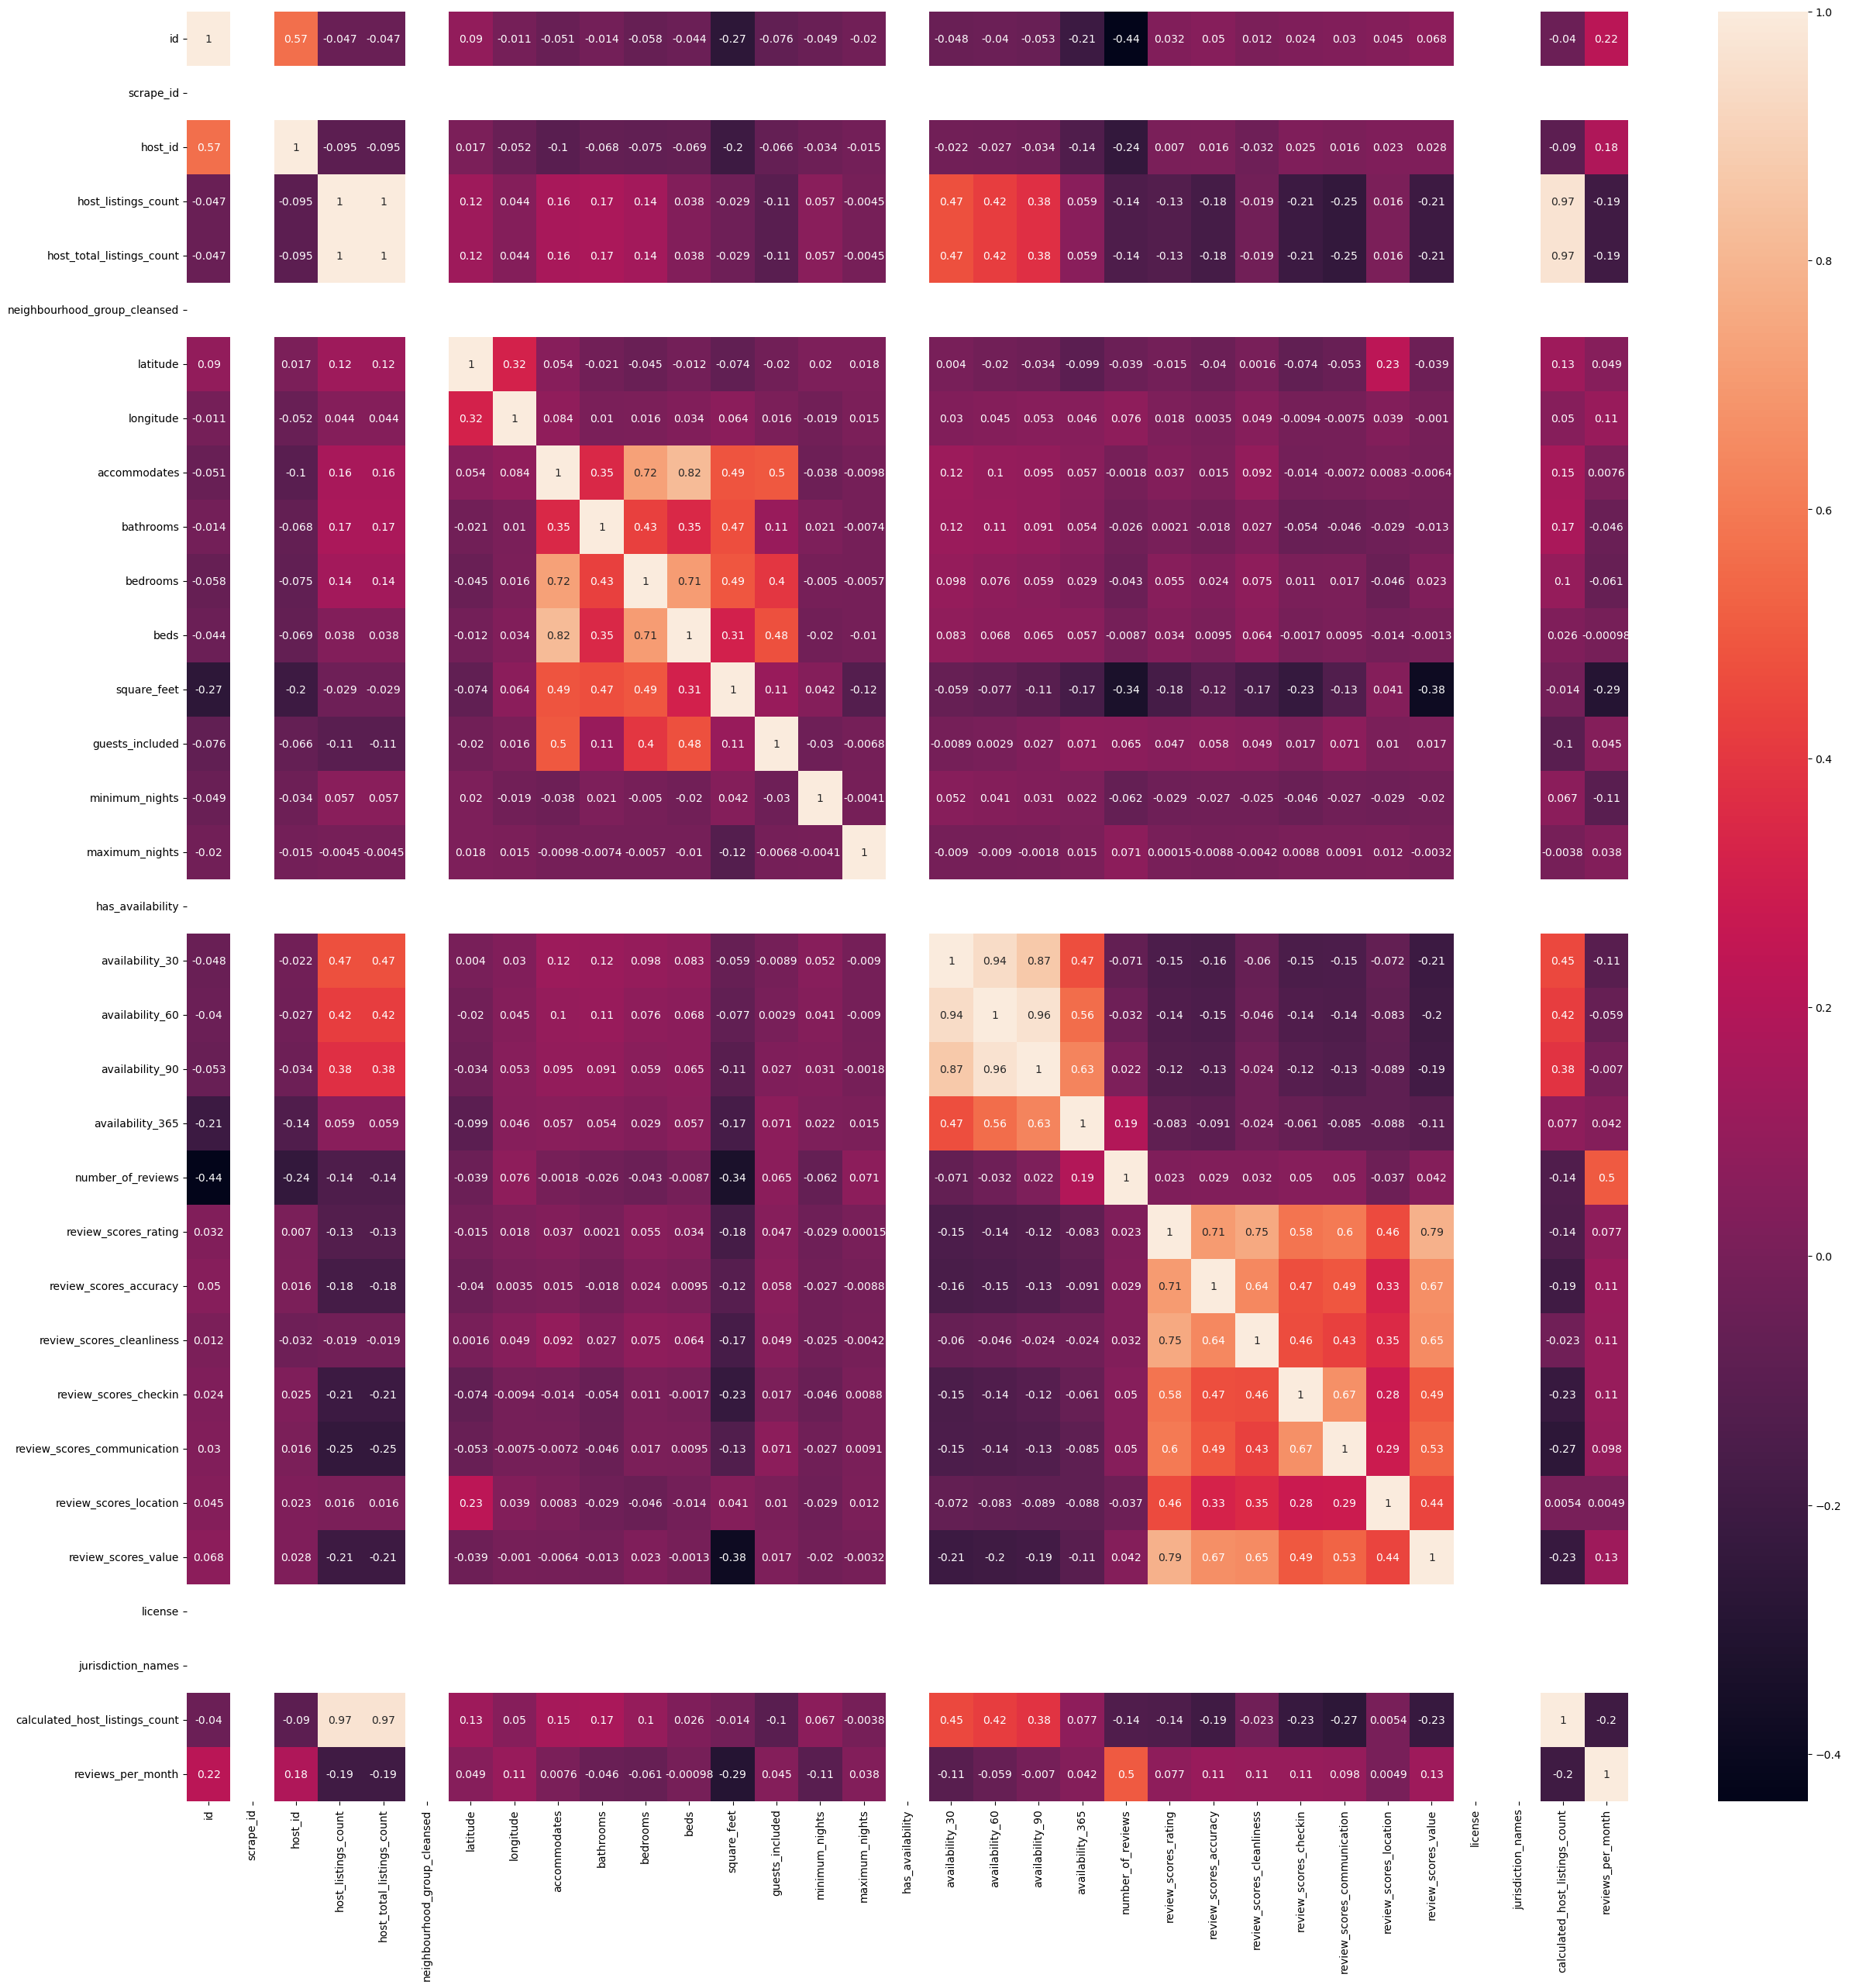

In [12]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

## Data Cleaning
For the data cleaning, usually it's done by deleting the unnecessary columns, however due to the massive amount of columns here, we thought it would be a better idea to just **select** the useful columns. 

### Feature Selection
After plotting our heatmap, we observed the most correlated columns to identify which features are going to be the most useful ones. Apart from the heatmap you can observe with common sense that factors such as "reviews_per_month" and "price" are bound to have a correlation with popularity.

In [13]:

# instead of dropping unuseful columns, we can select useful columns
# we can select columns based on our requirement
useful_col=df.loc[:,['latitude','longitude','is_location_exact','room_type','accommodates',
                     'bathrooms','bedrooms','beds','bed_type','square_feet','price','number_of_reviews']]
                     
useful_col
var=np.var(useful_col)
print(var)
useful_col.describe()

latitude                  0.000595
longitude                 0.000996
accommodates              3.163707
bathrooms                 0.251419
bedrooms                  0.566940
beds                      1.023341
square_feet          364107.784439
number_of_reviews      1264.989919
dtype: float64


D:\ANACONDA\lib\site-packages\numpy\core\fromnumeric.py:3713: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,number_of_reviews
count,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000
mean,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,19.044630
std,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,35.571658
min,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000
50%,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,5.000000
75%,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,21.000000
max,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,404.000000


In [14]:
# find the number of missing values in each column
useful_col.isnull().sum()

latitude                0
longitude               0
is_location_exact       0
room_type               0
accommodates            0
bathrooms              14
bedrooms               10
beds                    9
bed_type                0
square_feet          3529
price                   0
number_of_reviews       0
dtype: int64

In [15]:
# information about the data
useful_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   latitude           3585 non-null   float64
 1   longitude          3585 non-null   float64
 2   is_location_exact  3585 non-null   object 
 3   room_type          3585 non-null   object 
 4   accommodates       3585 non-null   int64  
 5   bathrooms          3571 non-null   float64
 6   bedrooms           3575 non-null   float64
 7   beds               3576 non-null   float64
 8   bed_type           3585 non-null   object 
 9   square_feet        56 non-null     float64
 10  price              3585 non-null   object 
 11  number_of_reviews  3585 non-null   int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 336.2+ KB


## More data pre-processing
Using simple imputer and ordinal encoder, we are able to fill in the missing values and transform categorical data to numerical data, onehot encoder could be use too. You may ask, what even is an Ordinal Encoder and a simple imputer?

### Ordinal Encoder
An ordinal encoder is a preprocessing technique used to convert categorical variables with ordered or hierarchical relationships into numeric values. It assigns a unique integer value to each category, preserving the ordinal relationship between the categories.

The ordinal encoder is particularly useful when dealing with features that have inherent order or rank, such as room types in our example (e.g., "Entire home", "Private Room", "Shared room") or bed types (e.g., "Real bed", "Pull-out sofa", "Couch").

Having an available numerical version of these categories will help us later on in training our models as numerical variables are generally easier to work with when it comes to data training.

### Simple Imputer
As for the SimpleImputer, it is a preprocessing class provided by the scikit-learn library that is used to handle missing values in a dataset. It provides a simple strategy to impute or fill in missing values with a specified constant value or with statistics such as the mean, median, or most frequent value of the respective feature.

## Ordinal Encoder 
### is_location_exact
This variable determines whether the given location of the airbnb is exact (GPS pin) or not (A near crosswalk or street name is provided). The ordinal encoder converted False and True values to 0 and 1 respectively. 

In [16]:
useful_col['is_location_exact'].unique()

array(['t', 'f'], dtype=object)

In [17]:
# Create an object of class OrdinalEncoder
# 0 is false, 1 is true
is_location_exact=['f','t'] 
enc = OrdinalEncoder(categories=[is_location_exact])
enc.fit(useful_col[['is_location_exact']])
useful_col['is_location_exact']=enc.transform(useful_col[['is_location_exact']])

### room_type
This variable determines the room type of the Airbnb, we assigned value 0 for Entire home/apartment, 1 for private room, and 2 for shared room.

In [18]:
useful_col['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [19]:
# 0 is Entire home/apt, 1 is Private room, 2 is Shared room
room_type=['Entire home/apt', 'Private room', 'Shared room'] 
enc = OrdinalEncoder(categories=[room_type])
enc.fit(useful_col[['room_type']])
useful_col['room_type']=enc.transform(useful_col[['room_type']])


### bed_type
This variable determines the bed type of the Airbnb, 0 was used for a real bed, 1 for pull-out sofa, 2 for a futon, 3 for an airbed, and 4 for couch.

In [20]:
useful_col['bed_type'].unique()

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Airbed', 'Couch'],
      dtype=object)

In [21]:
# 0 is Real Bed, 1 is Pull-out Sofa, 2 is Futon, 3 is Airbed, 4 is Couch
bed_type=['Real Bed', 'Pull-out Sofa', 'Futon', 'Airbed', 'Couch'] 
enc = OrdinalEncoder(categories=[bed_type])
enc.fit(useful_col[['bed_type']])
useful_col['bed_type']=enc.transform(useful_col[['bed_type']])

## Simple Imputer
### bathrooms
Here we used a median strategy as the after testing, we had a mode of 1 and a mean of 4.5, which is a big difference. This indicates a large amount of outliers, hence a median approach is preferrable in this case.

In [22]:
# could use mode too 
# mean is not that good since 4.5 large compared to mode 1
imputer=SimpleImputer(missing_values=np.nan,strategy='median') 
imputer.fit(useful_col[['bathrooms']]) 
useful_col['bathrooms']=imputer.transform(useful_col[['bathrooms']])

### bedrooms
We also used a median approach for bedrooms as it contained outliers of 6 & 7, making the mean an inaccurate method.

In [23]:
# contain outlier 6  
imputer=SimpleImputer(missing_values=np.nan,strategy='median') 
imputer.fit(useful_col[['bedrooms']]) 
useful_col['bedrooms']=imputer.transform(useful_col[['bedrooms']])

### beds
Since beds had a small number of missing values (9) [Refer to output 12], we figured the median would also be a good approach.

Using the median as an imputation strategy can be a good approach when there is a small number of missing values for several reasons:

1- Robustness to Outliers: The median is less sensitive to outliers compared to the mean. If the data contains outliers, using the median as an imputation strategy can provide a more robust estimate of the central tendency.

2- Preserving the Distribution: By using the median, you are more likely to preserve the distribution of the feature. The median represents the middle value in a sorted list of values, so it reflects the central tendency of the data more accurately if the distribution is skewed or has heavy tails. This also prevents the biases carried by using the mean.

In [24]:
# since number of missing values is less compared to others, median might be the best option
imputer=SimpleImputer(missing_values=np.nan,strategy='median') 
imputer.fit(useful_col[['beds']]) 
useful_col['beds']=imputer.transform(useful_col[['beds']])

In [25]:
# replace missing values with random integer values between 100 and 2300
# create a list to store random values
random_size=[]
# use a constant set of random values
np.random.seed(0)
# generate random values
for x in range (0,3585):
    random_size.append(np.random.randint(100, 2300, size=3585)) # append the random values to the list

# fill in the missing values with random values, the pd.Series is used to match the index of the random values with the index of the missing values
for i in random_size:
    useful_col['square_feet']=useful_col['square_feet'].fillna(pd.Series(i))



### Data Type Conversion
It's safe to say that all our data can be represented in numerical forms now, so we went ahead and converted it all to int64 format rather than float/object data types, this will aid us in developing our ML Model later on.

In [26]:
# convert data type to int64
useful_col['latitude']=useful_col['latitude'].astype('int64')
useful_col['longitude']=useful_col['longitude'].astype('int64')
useful_col['is_location_exact']=useful_col['is_location_exact'].astype('int64')
useful_col['room_type']=useful_col['room_type'].astype('int64')
useful_col['bed_type']=useful_col['bed_type'].astype('int64')
useful_col['square_feet']=useful_col['square_feet'].astype("int64")
useful_col['beds']=useful_col['beds'].astype("int64")



In [27]:
# make sure no more missing values
useful_col['square_feet'].unique()

array([1753,  935,  863, ..., 1105,  303, 1291], dtype=int64)

In [28]:
# make sure the data is encode into numerical values
useful_col['is_location_exact'].unique()

array([1, 0], dtype=int64)

In [29]:
useful_col['price'].unique()

array(['$250.00', '$65.00', '$75.00', '$79.00', '$100.00', '$58.00',
       '$229.00', '$60.00', '$57.00', '$93.00', '$150.00', '$145.00',
       '$165.00', '$49.00', '$40.00', '$120.00', '$70.00', '$175.00',
       '$95.00', '$90.00', '$67.00', '$55.00', '$200.00', '$110.00',
       '$115.00', '$125.00', '$78.00', '$50.00', '$45.00', '$85.00',
       '$89.00', '$285.00', '$140.00', '$80.00', '$63.00', '$46.00',
       '$62.00', '$69.00', '$73.00', '$61.00', '$27.00', '$190.00',
       '$149.00', '$168.00', '$205.00', '$117.00', '$429.00', '$267.00',
       '$87.00', '$300.00', '$119.00', '$195.00', '$210.00', '$500.00',
       '$130.00', '$450.00', '$399.00', '$350.00', '$99.00', '$295.00',
       '$107.00', '$76.00', '$59.00', '$88.00', '$164.00', '$185.00',
       '$105.00', '$319.00', '$53.00', '$199.00', '$114.00', '$180.00',
       '$92.00', '$84.00', '$275.00', '$230.00', '$192.00', '$170.00',
       '$240.00', '$225.00', '$178.00', '$109.00', '$383.00', '$184.00',
       '$299.

### Price pre-processing
The price column that came with the dataset included the commas and $ sign that often come with the price tag (e.g $2,500 instead of 2500), we humans can easily recognize this as a price but it would leave our model confused, so we cleaned that as well.

In [94]:
df['price']=df['price'].str.replace('$','')
df['price']=df['price'].str.replace(',','')
df['price']=pd.to_numeric(df['price'])

C:\Users\oltbo\AppData\Local\Temp\ipykernel_10680\3605680097.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price']=df['price'].str.replace('$','')


In [30]:
# remove special characters from price column using replace method 

useful_col['price']=useful_col['price'].str.replace('$','')


C:\Users\oltbo\AppData\Local\Temp\ipykernel_10680\1785561857.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  useful_col['price']=useful_col['price'].str.replace('$','')


In [31]:
useful_col['price']=useful_col['price'].str.replace(',','')

In [32]:

# convert data type from object to float
useful_col['price']=pd.to_numeric(useful_col['price'])

In [33]:
# convert data type float into int
useful_col['price']=useful_col['price'].astype('int64') 

In [34]:
useful_col['price'].unique()

array([ 250,   65,   75,   79,  100,   58,  229,   60,   57,   93,  150,
        145,  165,   49,   40,  120,   70,  175,   95,   90,   67,   55,
        200,  110,  115,  125,   78,   50,   45,   85,   89,  285,  140,
         80,   63,   46,   62,   69,   73,   61,   27,  190,  149,  168,
        205,  117,  429,  267,   87,  300,  119,  195,  210,  500,  130,
        450,  399,  350,   99,  295,  107,   76,   59,   88,  164,  185,
        105,  319,   53,  199,  114,  180,   92,   84,  275,  230,  192,
        170,  240,  225,  178,  109,  383,  184,  299,  155,  135,   29,
         68,  136,  189,   72,   22,   82,  160,   94,   83,  750,   77,
         71,  220,   54,  480,  550,  325,  290,  159,   56,  235,   86,
        255,   91,   81,   48,   37,  525,   25,   64,  725,  179,  249,
        239,   30,  872,  269,  169,   52,  208,  349,   35,   41,   20,
         74,   42,  103,  272,   28,  215,  246,  289,  247,  139,  188,
        400,  375,  129,  245,  390,  219,  259,  3

In [35]:
# check the data types of the columns to ensure no object data type
useful_col.dtypes

latitude               int64
longitude              int64
is_location_exact      int64
room_type              int64
accommodates           int64
bathrooms            float64
bedrooms             float64
beds                   int64
bed_type               int64
square_feet            int64
price                  int64
number_of_reviews      int64
dtype: object

In [36]:
# check whether still contain missing values
useful_col.isnull().sum()

latitude             0
longitude            0
is_location_exact    0
room_type            0
accommodates         0
bathrooms            0
bedrooms             0
beds                 0
bed_type             0
square_feet          0
price                0
number_of_reviews    0
dtype: int64

## Popularity Score Estimation
If you observe the data fields provided in the listings.csv file, you wouldn't directly find a "popularity" field, however you would find many fields that would provide good measures of popularity such as "reviews_per_month" and "review_scores_rating".

We created a new field called "Popularity" and since "review_scores_rating" has a minimum of 0 and maximum of 100, we could divide the entries in the dataset with seperate ratings. Here are the ratings we used:

• If review_scores_rating is 0, that means the property has no ratings and is assigned value '0' (unpopular).

• If review_scores_rating lies between 1-40, that means it has a low popularity and is assigned value '1'.

• If review_scores_rating lies between 41-70, that means it has a medium popularity and is assigned value '2'.

• If review_scores_rating lies between 71-100, that means it has a high popularity and is assigned value '3'.

In [37]:
#create a conditions list based on the review_scores_rating
#using logical and operator to create the range of values
# assumption: 0 is no rating, 1 is low rating, 2 is medium rating, 3 is high rating and popularity is based on the review_scores_rating
# it could based on other features too, such as price would be a good feature to determine the popularity
# notice that we didnt include the review_scores_rating into our training data, since it may cause our model to ovefit
conditions=[
    (df['review_scores_rating'] ==0 ),
    (df['review_scores_rating'] >= 1) & (df['review_scores_rating'] <= 40),
    (df['review_scores_rating'] >= 41) & (df['review_scores_rating'] <= 70),
    (df['review_scores_rating'] >= 71) & (df['review_scores_rating'] <= 100),
   
]

# create a list of the values we want to assign for each condition
values=[0,1,2,3]

# create a new column and use np.select to assign values to it using our lists as arguments
useful_col['popularity']=np.select(conditions,values)

In [38]:
# insert the new column to the 12th position. with all values as missing values
#useful_col.insert(12,'popularity',np.nan)

In [39]:
random_pop=[]
# use a constant set of random values
np.random.seed(0)
# generate random values
for k in range (0,3585):
    random_pop.append(np.random.randint(0, 2, size=3585)) # append the random values to the list

# fill in the missing values in population with random values, 
# the pd.Series is used to match the index of the random values with the index of the missing values
for j in random_pop:
    useful_col['popularity']=useful_col['popularity'].fillna(pd.Series(j))

In [40]:
useful_col

,latitude,longitude,is_location_exact,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,number_of_reviews,popularity
0,42,-71,1,0,4,1.5,2.0,3,0,1753,250,0,0
1,42,-71,1,1,2,1.0,1.0,1,0,935,65,36,3
2,42,-71,1,1,2,1.0,1.0,1,0,863,65,41,3
3,42,-71,0,1,4,1.0,1.0,2,0,1831,75,1,3
4,42,-71,1,1,2,1.5,1.0,2,0,1133,79,29,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,42,-71,1,1,3,1.0,1.0,1,0,1397,69,4,3
3581,42,-71,0,1,2,1.0,1.0,1,0,303,150,0,0
3582,42,-71,0,0,4,1.0,1.0,1,0,268,198,0,0
3583,42,-71,1,1,2,1.0,1.0,1,0,1845,65,2,3


In [41]:
# convert data type from float to int
useful_col['popularity']=useful_col['popularity'].astype('int64')

In [42]:
# observe the difference between the mean and median, and also the min and max values, for future cleaning purposes
useful_col.describe()

,latitude,longitude,is_location_exact,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,number_of_reviews,popularity
count,3585.0,3585.0,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,42.0,-71.0,0.859135,0.429010,3.041283,1.220781,1.255230,1.607531,0.081729,1201.190795,173.925802,19.044630,2.287866
std,0.0,0.0,0.347930,0.538211,1.778929,0.500698,0.752129,1.010933,0.451638,631.871475,148.331321,35.571658,1.255226
min,42.0,-71.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,42.0,-71.0,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,669.000000,85.000000,1.000000,2.000000
50%,42.0,-71.0,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1202.000000,150.000000,5.000000,3.000000
75%,42.0,-71.0,1.000000,1.000000,4.000000,1.000000,2.000000,2.000000,0.000000,1741.000000,220.000000,21.000000,3.000000
max,42.0,-71.0,1.000000,2.000000,16.000000,6.000000,5.000000,16.000000,4.000000,2400.000000,4000.000000,404.000000,3.000000


## Experiments & Data Visualization  
After our data is pre-processed, we can finally visualize it using matplotlib. We chose to use boxplots, histograms, and violinplots to see the distribution of our final data. After viewing that distribution, it can aid us in removing outliers later on...


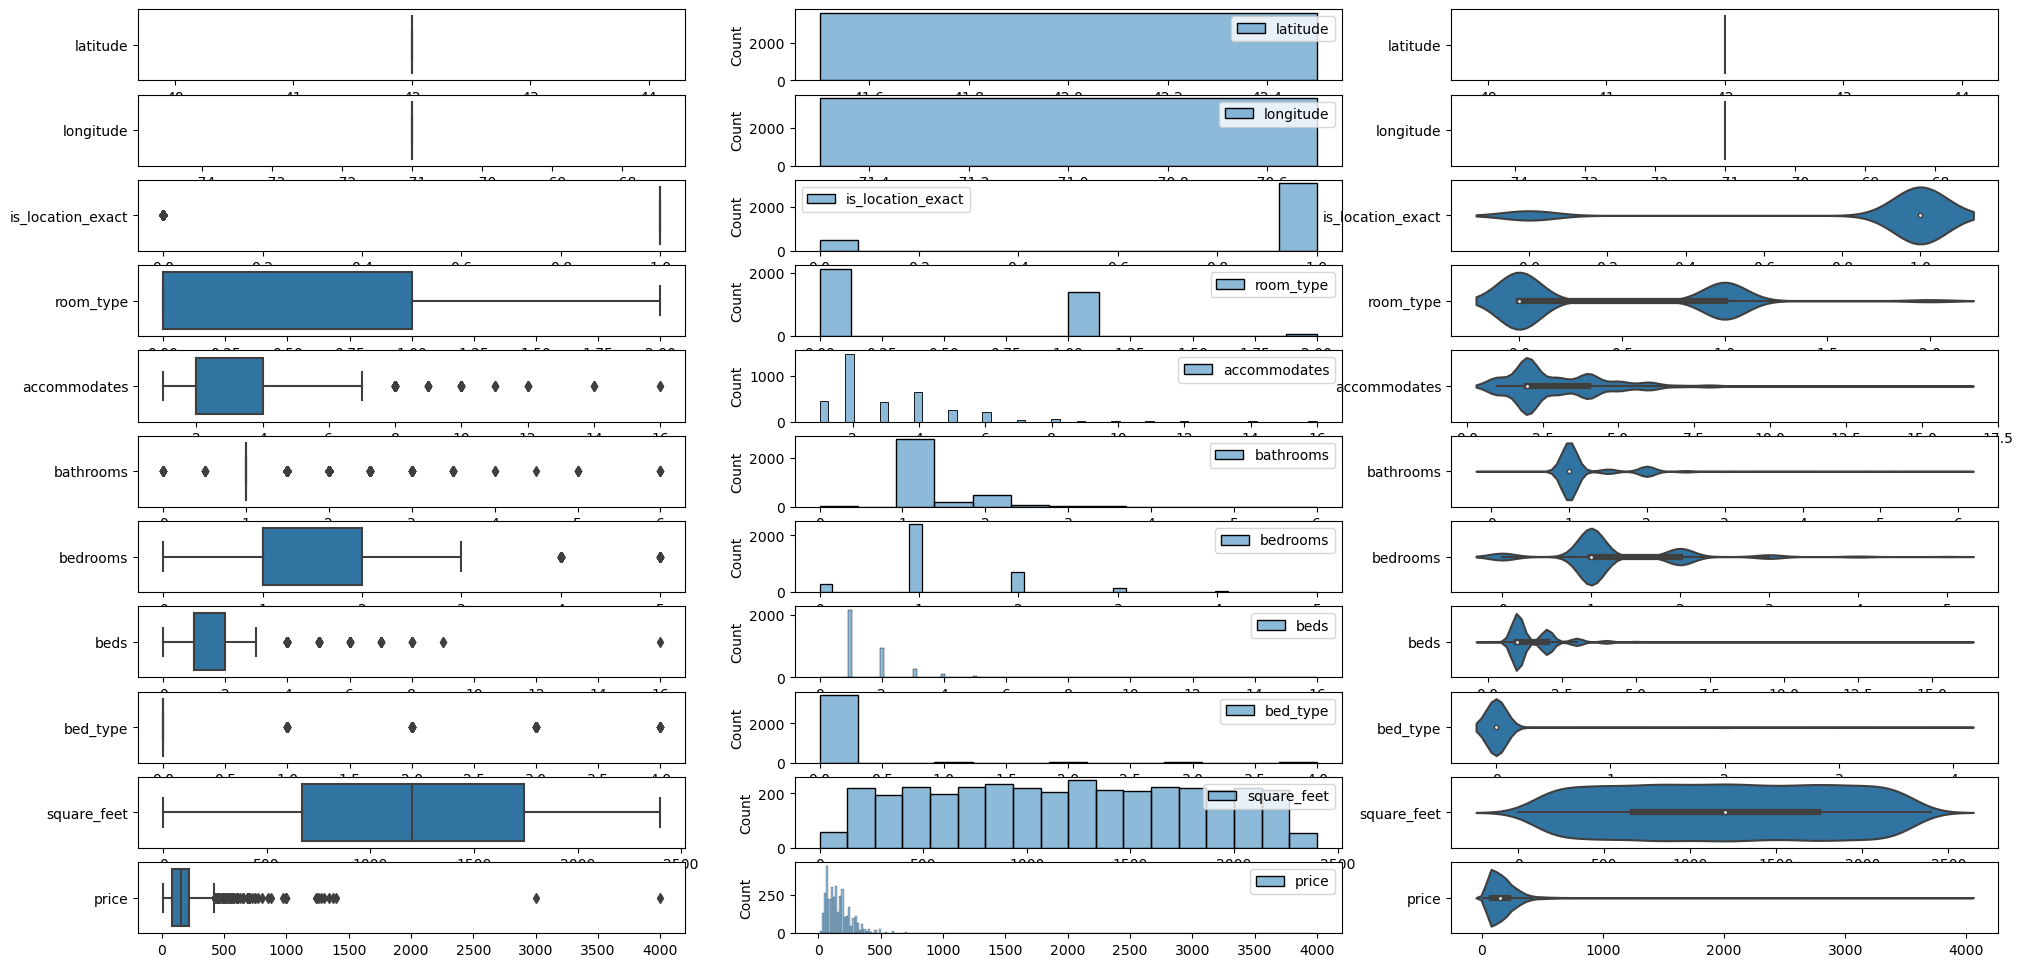

In [43]:
#set up matplotlib figure with three subplots
#some features may contain outliers, therefore we use boxplot, histogram and violinplot to visualize the distribution of the features before cleaning

f, axes=plt.subplots(11,3,figsize=(24,12)) 

for i in range(11):
    dft=pd.DataFrame(useful_col.iloc[:,i])
    sns.boxplot(data=dft,ax=axes[i,0],orient='h')
    sns.histplot(data=dft,ax=axes[i,1])
    sns.violinplot(data=dft,ax=axes[i,2],orient='h')

<Axes: xlabel='bedrooms', ylabel='beds'>

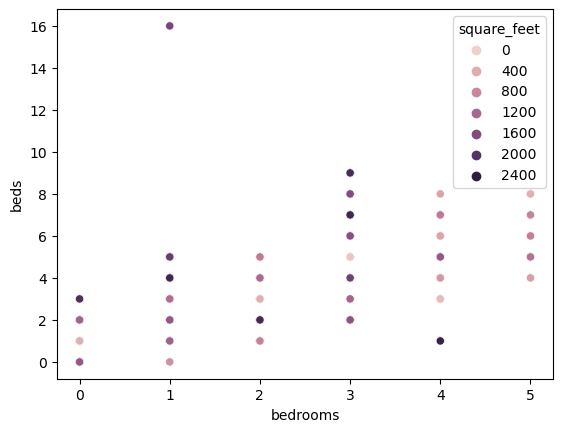

In [44]:

# show the relationship between bedrooms and beds, the minimum number of beds for 5 bedrooms is 5, which is reasonable
# for 1 bedrooms with 16 beds, it is not reasonable, it is consider as outlier, therefore we will remove it later on
sns.scatterplot(x='bedrooms',y='beds',data=useful_col,hue='square_feet')

### Factors affecting popularity
As "reviews_per_month" is the primary indicator of the popularity of the Airbnb rooms, this section will be testing possible features that may or may not have a correlation with it.

<Axes: xlabel='beds', ylabel='reviews_per_month'>

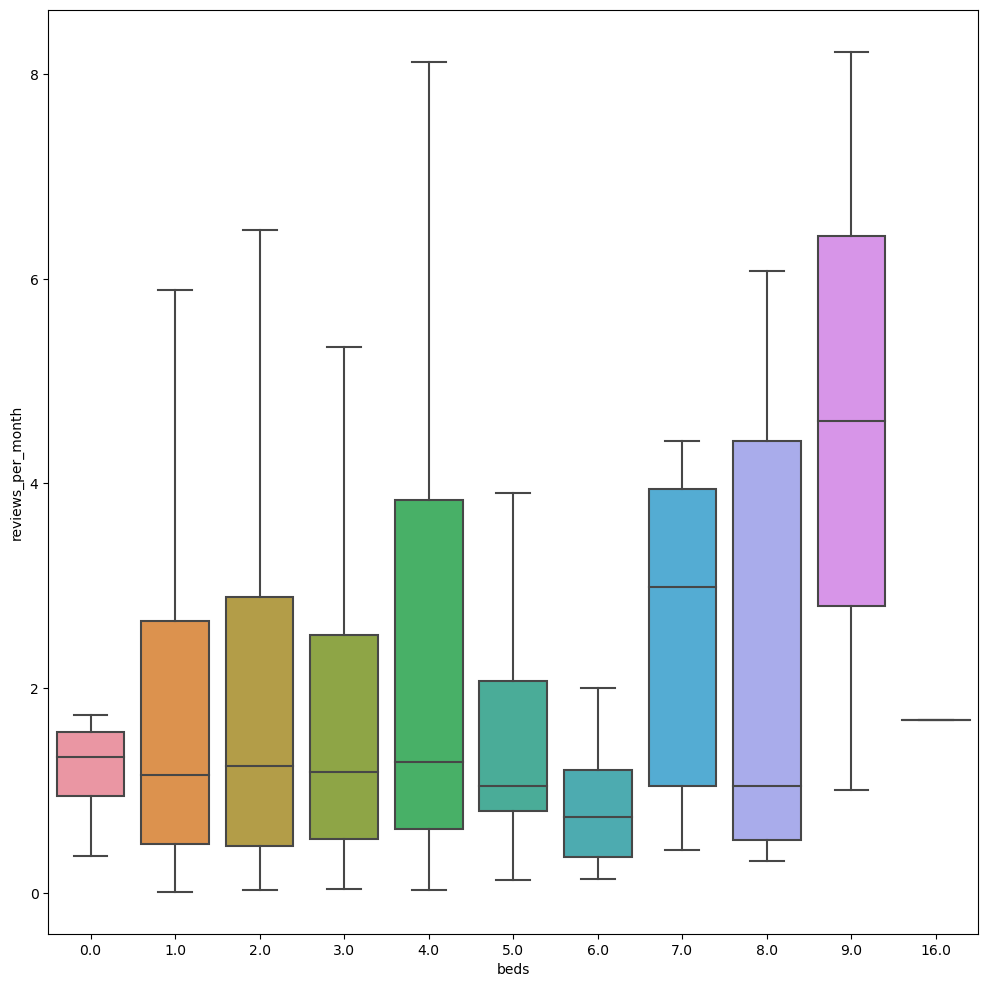

In [56]:
# Plotting a boxplot to quickly see if there is any trend
plt.figure(figsize=(12,12))
sns.boxplot(x='beds', y='reviews_per_month', data=df[['beds', 'reviews_per_month']], showfliers = False)

<Axes: xlabel='room_type', ylabel='reviews_per_month'>

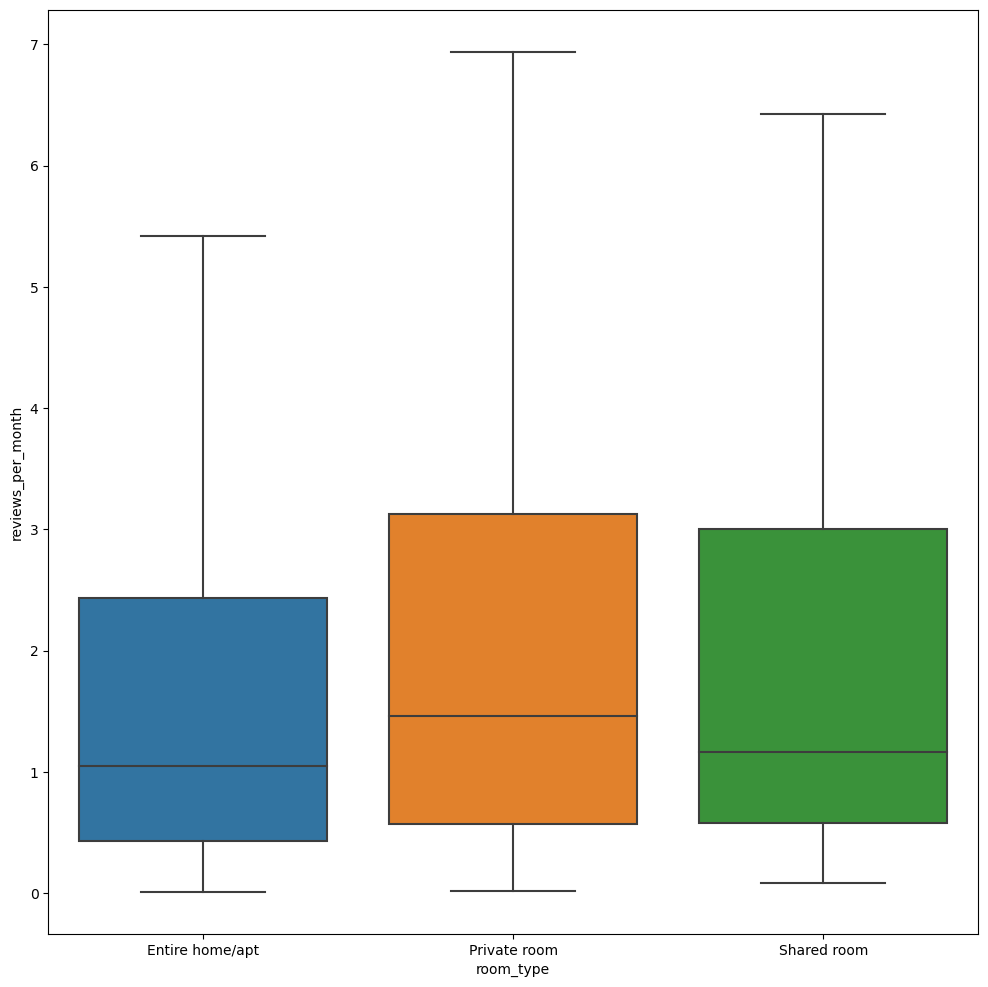

In [59]:
# Plotting a boxplot to quickly see if there is any trend
plt.figure(figsize=(12,12))
sns.boxplot(x='room_type', y='reviews_per_month', data=df[['room_type', 'reviews_per_month']], showfliers = False)

<Axes: xlabel='bed_type', ylabel='reviews_per_month'>

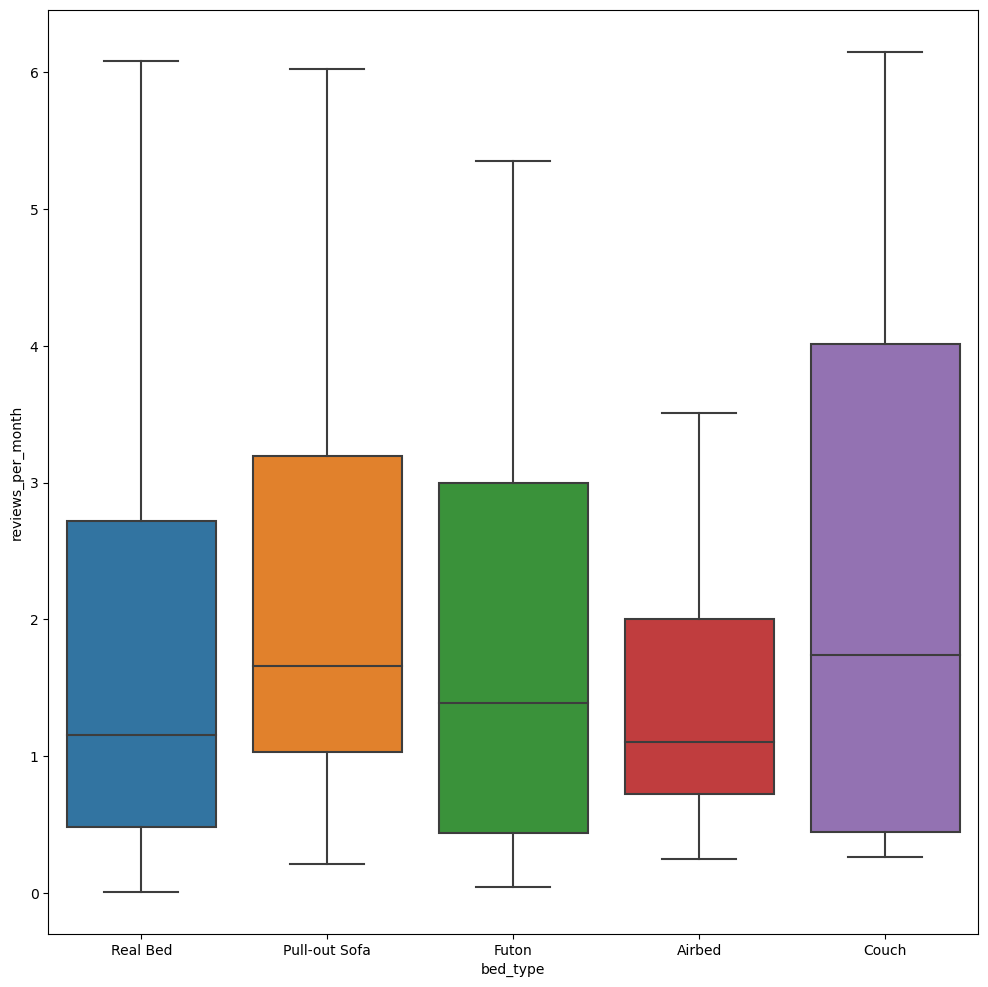

In [77]:
# Plotting a boxplot to quickly see if there is any trend
plt.figure(figsize=(12,12))
sns.boxplot(x='bed_type', y='reviews_per_month', data=df[['bed_type', 'reviews_per_month']], showfliers = False)


<Axes: xlabel='host_response_time', ylabel='reviews_per_month'>

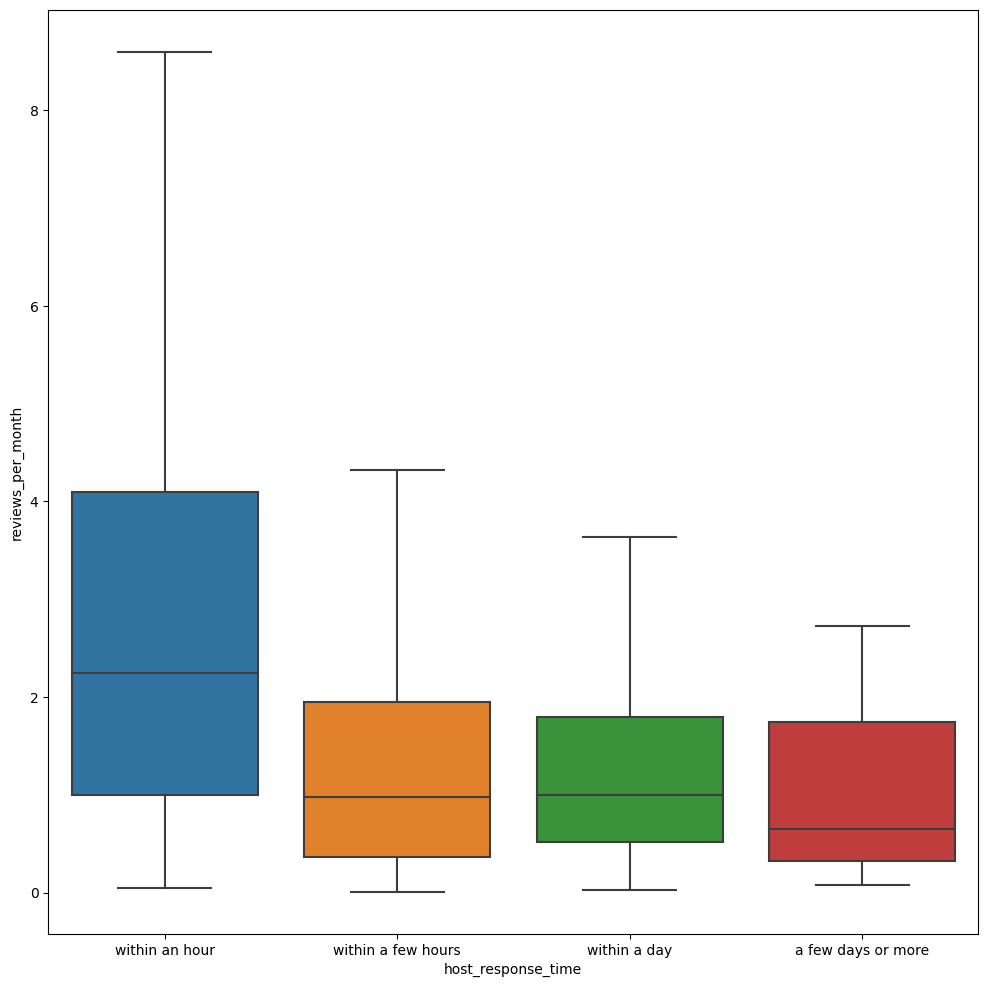

In [92]:
# Plotting a boxplot to quickly see if there is any trend
plt.figure(figsize=(12,12))
sns.boxplot(x='host_response_time', y='reviews_per_month', data=df[['host_response_time', 'reviews_per_month']], showfliers = False)


<Axes: xlabel='is_location_exact', ylabel='reviews_per_month'>

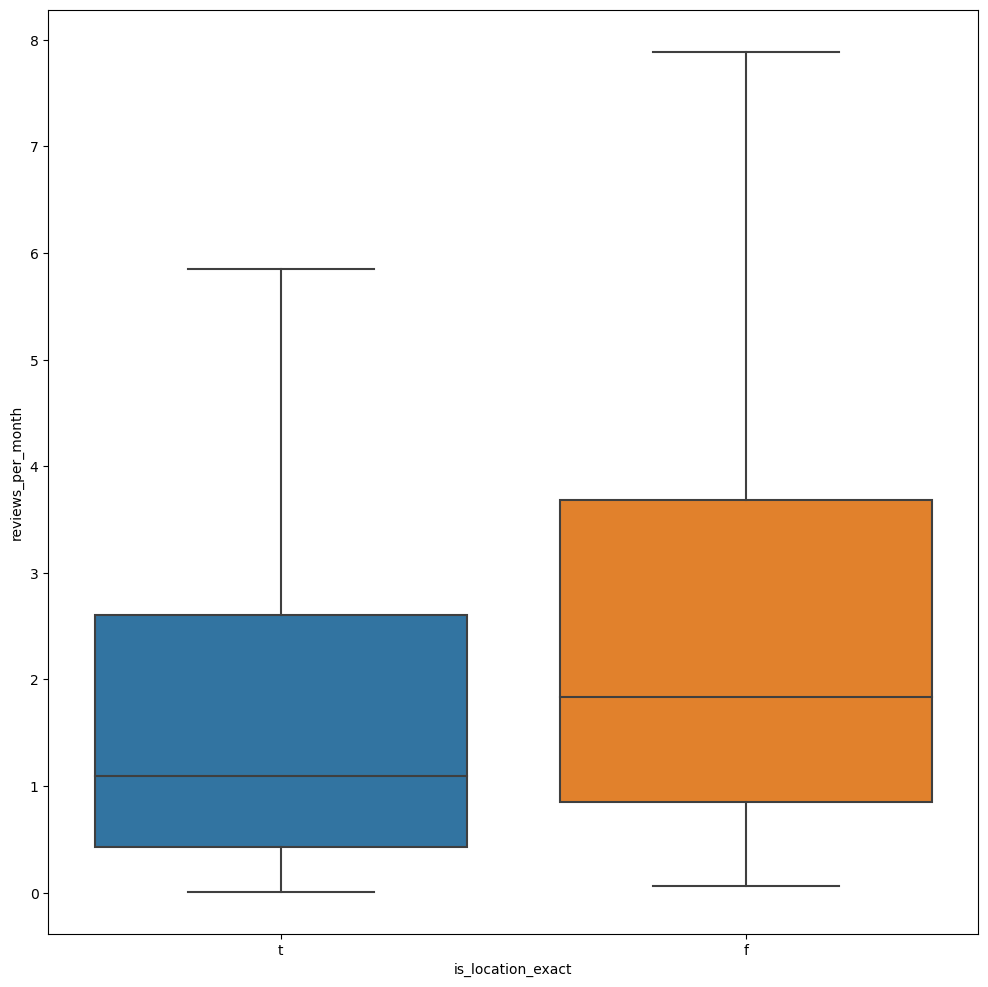

In [93]:
# Plotting a boxplot to quickly see if there is any trend
plt.figure(figsize=(12,12))
sns.boxplot(x='is_location_exact', y='reviews_per_month', data=df[['is_location_exact', 'reviews_per_month']], showfliers = False)


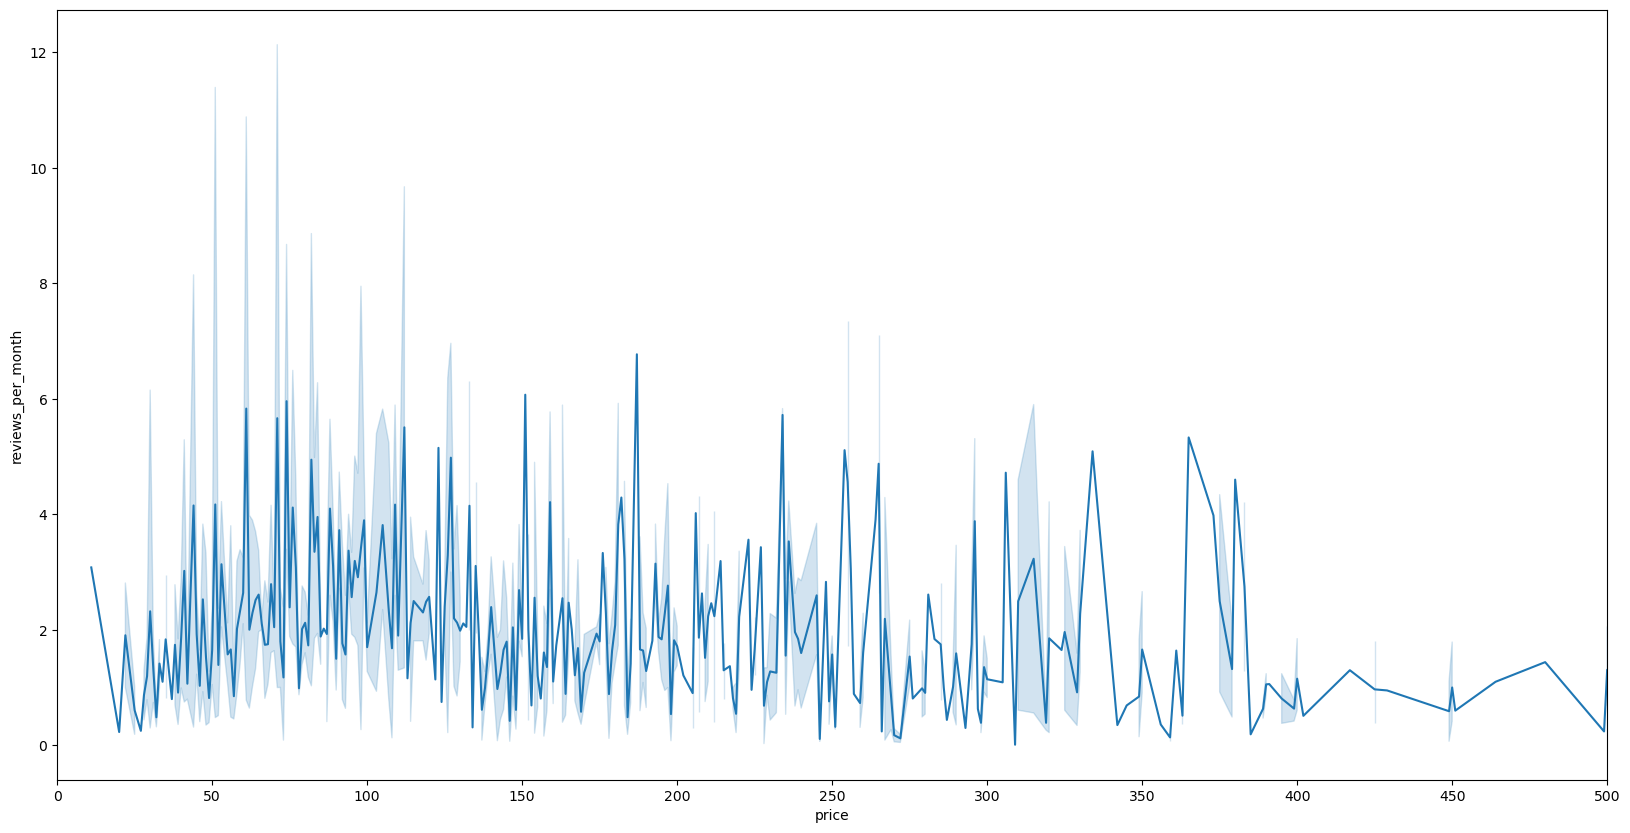

In [95]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='price', y='reviews_per_month', data=df[['price', 'reviews_per_month']])
plt.xlim(0, 500)
plt.xticks(range(0, 501, 50))
plt.show()

<Axes: xlabel='bedrooms', ylabel='count'>

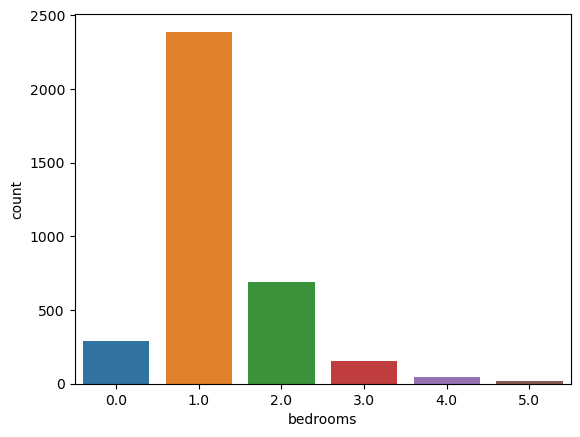

In [50]:
sns.countplot(x='bedrooms',data=useful_col)

<Axes: xlabel='beds', ylabel='count'>

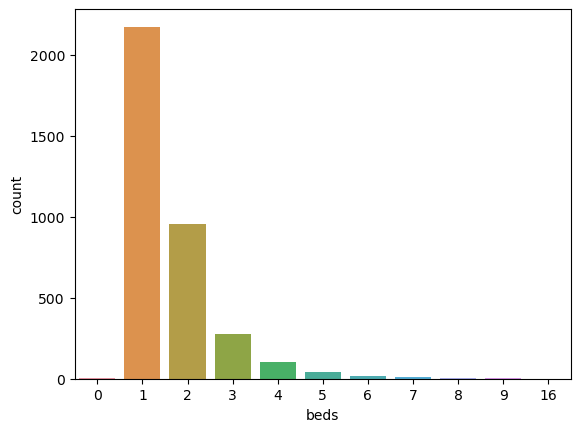

In [51]:
sns.countplot(x='beds',data=useful_col)

<Axes: xlabel='square_feet', ylabel='price'>

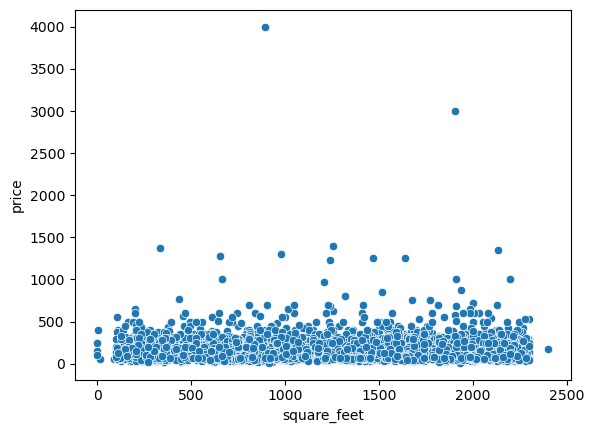

In [91]:
# scatterplot to show the relationship between price and square_feet
sns.scatterplot(x='square_feet',y='price',data=useful_col)

In [ ]:
# shows the correlation between the features after encoding
# for example, bedrooms and beds are highly correlated, which is 0.7
plt.figure(figsize=(20,20)) # set the size of the figure
sns.heatmap(useful_col.corr(),annot=True,fmt='.1f',vmin=-1,vmax=1)

In [ ]:
plt.figure(figsize=(30,40))
sns.boxplot(data=useful_col)

### Data Cleaning
Now that we have visualized the fields with a good amount of outliers, we can create an outlier removal function and apply it to all of them!

#### Why is cleaning outliers important?
**Reducing Noise**: Outliers are data points that deviate significantly from the majority of the data. They can introduce noise and distort the relationships between variables. By removing outliers, you can reduce the noise and improve the accuracy of the model's predictions.

**Preserving Model Generalization**: Machine learning models aim to learn patterns and relationships in the data that can generalize well to unseen examples. Outliers, by definition, are atypical and do not represent the underlying patterns of the majority of the data. If outliers are not removed, the model may overly focus on these unusual instances, leading to poor generalization performance on new data.

In [ ]:
# function to remove outliers
# if Z-score >3, it is considered as outlier
def detect_outliers(column):
    z_scores = (column - column.mean()) / column.std()
    threshold = 3
    outliers_mask = np.abs(z_scores) > threshold
    return outliers_mask

# column that contains outliers based on visualization on boxplots 
outlier_col=['accommodates','bathrooms','bedrooms','beds','price','square_feet','latitude','longitude','number_of_reviews']
for col in outlier_col:
    outliers_mask = detect_outliers(useful_col[col])
    useful_col = useful_col[~outliers_mask] # remove the outliers from the training set

## ML Model Development
1- First we began by using the **train_test_split** function, this divides the dataset we have into **2 subsets**, 1 for **training** the model and 1 for **testing** the model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=useful_col.iloc[:,:-1]

print(x)

In [ ]:
y=useful_col.iloc[:,-1]
print(y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
y

In [ ]:
X_train

In [ ]:
y_train

### Ensuring our Outlier Cleaning Worked
Before we commenced with model traning, we wanted to verify that the outlier cleaning function did in fact work, so we graphed our features again and while the number of outliers did in fact decrease, there was a big difference between the maximum and minimum value of each feature. This meant that we had to apply scaling to our data and then normalize it so the data is ML Model fit.

In [ ]:
# violinolot show the summary statistics and density of eatch features, middle is the median, the thick black line is the interquartile range, 
# and the thin black line is  1.5 times the interquartile range
# histplot shows the distribution of the data
f, axes=plt.subplots(11,3,figsize=(24,12)) # 6 is number of features,3 is number of different plots for each feature

for i in range(11):
    dft=pd.DataFrame(X_train.iloc[:,i])
    sns.boxplot(data=dft,ax=axes[i,0],orient='h')
    sns.histplot(data=dft,ax=axes[i,1],kde=True)
    sns.violinplot(data=dft,ax=axes[i,2],orient='h')

A good way of viewing the distributions of our features is using the typical **histogram**, but additionally, we can also introduce a "Probplot" in. A probability plot shows the actual distribution of our data **against** the theoretical distribution, this can guide us in a good direction.

In [ ]:
# plot the distribution of the features before scaling and normalization
# the probability plot shows the distribution of the data against the theoretical distribution
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(col)


In [ ]:
# The differece between max and min is too large, therefore we need to scale the data to ensure the model is not bias
# the scaling id done later on

X_train.describe()

Outlier removal function

In [ ]:
X_train

In [ ]:
y_train

### Data Scaling Techniques
We had 5 different data scaling techniques to choose from:

1-PowerTransformer: this data scaling technique is a method used to transform numerical data to follow a more Gaussian or normal distribution. It applies a power transformation to the data, which helps to stabilize variance and make the data more symmetric.

The PowerTransformer technique is particularly useful when dealing with data that exhibits skewness or has heavy tails, however this wasn't the case according to our distributions so we chose not to use this one.

2-MinMaxScaler: this data scaling technique is a method used to transform numerical data so that it is scaled to a specified range, typically between 0 and 1. It linearly rescales the data based on the minimum and maximum values in the original dataset. However our features all had different maximums and minimums so this technique wouldn't provide accurate results.

3-QuantileTransformer: this data scaling technique is a method used to transform numerical data to follow a specified probability distribution. It aims to map the data to a uniform or Gaussian distribution by estimating the quantiles of the original data and transforming them accordingly. But this technique utilizies a **non-linear transformation**, which means it can distort the original relationships between data points, hence we avoided using it as well.

4-RobustScaler: this data scaling technique is a method used to transform numerical data by centering and scaling it based on robust statistics. It is particularly useful when dealing with data that contains outliers or is not normally distributed. This was a good choice in theory alongside technique number 5. However we could only pick 1 technique, so we chose number 5 as it's more widely used, so it would be easier to find help if we encounter issues along the way.

5-StandardScaler: this data scaling technique is a widely used method for transforming numerical data by centering it around the mean and scaling it to have a unit variance. This is exactly what we were looking for, it's much more straight to the point. We decided to use it.

In [ ]:
#pt=PowerTransformer(method='yeo-johnson',standardize=True) 
# Yeo-Johnson is used to transform the data to make  the data more normally distributed
# standardize is used to scale the data to ensure the mean is 0 and the variance is 1
#cols = X_train[['latitude', 'longitude','accommodates','square_feet', 'price', 'number_of_reviews']]
#col=X_test[['latitude', 'longitude','accommodates','square_feet', 'price', 'number_of_reviews']]
#X_train_transformed=pt.fit_transform(cols)
#X_test_transformed=pt.transform(col)

#X_train.loc[:,['latitude', 'longitude','accommodates','square_feet', 'price','number_of_reviews']] = X_train_transformed
#X_test.loc[:,['latitude', 'longitude','accommodates','square_feet', 'price','number_of_reviews']] = X_test_transformed


In [ ]:
X_train

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scalar=MinMaxScaler()
#useful_col[['price', 'square_feet']]=scalar.fit_transform(useful_col[[ 'price', 'square_feet']])
#print(useful_col[['longitude','latitude', 'price', 'review_scores_rating', 'square_feet','number_of_reviews']])
#sns.distplot(useful_col['longitude'])

In [ ]:
#from sklearn.preprocessing import QuantileTransformer
# Transform the numerical Train data into normal distribution
#columns = ['latitude', 'longitude', 'accommodates','square_feet','price','number_of_reviews']
#qt_transformer = QuantileTransformer(output_distribution = "uniform",
                                     #random_state = 0)
#col_scaled = qt_transformer.fit_transform(X_train[columns])
#cols_scaled = qt_transformer.transform(X_test[columns])
#X_train.loc[:,['latitude', 'longitude', 'accommodates','square_feet','price','number_of_reviews']] = col_scaled
#X_test.loc[:,['latitude', 'longitude', 'accommodates','square_feet','price','number_of_reviews']] = cols_scaled

In [ ]:
#from sklearn.preprocessing import RobustScaler
#columns = ['latitude', 'longitude', 'accommodates','square_feet','price','number_of_reviews']
#transformer = RobustScaler()
#col_scaled = transformer.fit_transform(X_train[columns])
#cols_scaled = transformer.transform(X_test[columns])
#X_train.loc[:,['latitude', 'longitude', 'accommodates','square_feet','price','number_of_reviews']] = col_scaled
#X_test.loc[:,['latitude', 'longitude', 'accommodates','square_feet','price','number_of_reviews']] = cols_scaled

In [ ]:
#Standard Scaler Technique used below:
#scale the data after train_test_split to avoid data leakage
cols = X_train[['latitude', 'longitude','accommodates','square_feet', 'price', 'number_of_reviews']]
col=X_test[['latitude', 'longitude','accommodates','square_feet', 'price', 'number_of_reviews']]
sc = StandardScaler()
cols_scaled = sc.fit_transform(cols)
col_transformed=sc.transform(col)
X_train.loc[:,['latitude', 'longitude','accommodates','square_feet', 'price','number_of_reviews']] = cols_scaled
X_test.loc[:,['latitude', 'longitude','accommodates','square_feet', 'price','number_of_reviews']] = col_transformed




In [ ]:
y_train=pd.DataFrame(y_train)
y_train

In [ ]:
X_train.describe()

In [ ]:
y_train.describe()

In [ ]:
X_test.describe()

In [ ]:
y_test=pd.DataFrame(y_test)
y_test

We plot the same graphs **AFTER** the scaling and normalization to verify our results.

In [ ]:
# plot the distribution of the features after scaling and normalization
# the probability plot shows the distribution of the data against the theoretical distribution
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(col)

In [ ]:
num_classes=4

#X_test = X_test.astype('int64')
print(y_test)

In [ ]:
# convert the target variable to categorical
y_train= to_categorical(y_train, num_classes)
y_test= to_categorical(y_test, num_classes)

### Tuning our neural network
#### Experimenting with different tuning methods

##### Used techniques:

• **Dropout**: Dropout is a technique that supposedly helps prevent overfitting by randomly deactivating a fraction of neurons during each training step, forcing the network to learn more robust and generalizable representations.

• **Regularization**: It discourages large weights and encourages the model to distribute the weights more evenly across all features, reducing the impact of individual features.


In [ ]:
import tensorflow as tf
# early stopping method to avoid overfitting
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.2):
            print("\nLoss is low, stop training")
            self.model.stop_training = True

In [ ]:
callbacks = Callback()

In [ ]:
# using 8 fold cross validation, create sequential dense neural network and fit the model and train the model
#kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=0)
#cvscores = []
#for train, test in kfold.split(x, y):
 # create model
 #model = Sequential()
 #model.add(Dense(15, input_dim=12, activation='relu'))
 #model.add(Dense(15, activation='relu'))
 #model.add(Dense(num_classes, activation='softmax'))
 # Compile model
 #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # Fit the model
 #model.fit(X_train, y_train, epochs=70, batch_size=10, verbose=1)

#scores = model.evaluate(X_test, y_test, verbose=1)
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#cvscores.append(scores[1] * 100)
 
#print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [ ]:
# we tried to apply regularization to the model and the accuracy was improving a bit
# l2 regularization provides a penalty to the model for having large weights
#def dense_model(hidden_layers):
    #model = Sequential()
    #model.add(Dense(15, activation='relu', input_dim=12,kernel_regularizer=l2(0.002)))
    #for _ in range(hidden_layers):
        #model.add(Dense(15, activation='relu'))
    #model.add(Dense(num_classes, activation='sigmoid',kernel_regularizer=l2(0.002)))
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    #return model

In [ ]:
# We also tried to apply Dropout on the model but it seems not that efficient after applying
# Dropout is regularization  technique that drop certain neurons in the network to avoid overfitting
# but it reduce the accuracy of our model
# tanh activation function is preferred due to its zero centered output
#def dense_model(hidden_layers):
    #model = Sequential()
    #model.add(Dense(15, activation='relu', input_dim=12))
    #model.add(Dropout(0.5))
    #for _ in range(hidden_layers):
        #model.add(Dense(15, activation='relu'))
    #model.add(Dropout(0.5))
    #model.add(Dense(num_classes, activation='softmax'))
    #model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    #return model

In [ ]:

#model=dense_model(2)
#model.fit(X_train, y_train, epochs=200, batch_size=20, verbose=1, validation_split=0.2)#,callbacks=[callbacks])
#test_results=model.evaluate(X_test,y_test,verbose=1)
#train_results=model.evaluate(X_train,y_train,verbose=0)
#print(f'Test results-Loss: {test_results[0]}-Accuracy: {test_results[1]}')
#print(f'Train results-Loss: {train_results[0]}-Accuracy: {train_results[1]}')




### Model Creation
We created a function that allows us to specify whether we use dropout and/or L2 regularization in our training process.


In [ ]:
# function to create the model
# Dropout is regularization  technique that drop certain neurons in the network to avoid overfitting
# weight regularization is a penalty to the model for having large weights
def create_model(weight_reg=False,dropout_reg=False):
    model=Sequential()
    if weight_reg:
        model.add(Dense(15,input_dim=12,activation='relu',kernel_regularizer=l2(0.001)))
        for _ in range(2):
            model.add(Dense(15,activation='relu',kernel_regularizer=l2(0.001)))
        
    else:
        model.add(Dense(15,input_dim=12,activation='relu'))
        for _ in range(2):
            model.add(Dense(15,activation='relu'))
        
    if dropout_reg:
        model.add(Dropout(0.2))

    model.add(Dense(num_classes,activation='softmax')) # output layer
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [ ]:

model=create_model(weight_reg=False,dropout_reg=True)
history=model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2,callbacks=[callbacks])
test_results=model.evaluate(X_test,y_test,verbose=1)
train_results=model.evaluate(X_train,y_train,verbose=0)
print(f'Test results-Loss: {test_results[0]}-Accuracy: {test_results[1]}')
print(f'Train results-Loss: {train_results[0]}-Accuracy: {train_results[1]}')




## Results
After training our model for the first time, we ended up with a test accuracy of 89.73% and a train accuracy of 91.45%. Some may call this decent, however we wanted to use methods to furthermore improve these results. Also at first while training the data, we noticed that the accuracy was slightly inconsistent that it formed a zig-zag pattern rather than a more normal straight line, this could be due to noise in the data-set, and we addressed this through tuning our hyperparameters.

In [ ]:
# the zigzag pattern of accuracy might due to some noise in the datasets, and we tried to apply regularization and dropout and early stopping
# to improve the model and it works, we also tune the hyperparameters to get the best model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
  

In [ ]:
predictions = model.predict(X_test[:5])
print(predictions)

### Classifiers
We managed to reduce overfitting by fitting the training dataset into a **decision tree classifier**, this will predict the outcome of the dataset, and after that, we apply **random forest classifier** to predict the output of the outcome.\

For those unaware of what a DTC and RFC are:

• Decision Tree Classifier: this is a machine learning algorithm that is commonly used for classification tasks. It builds a predictive model in the form of a tree structure, where each internal node represents a feature or attribute, each branch represents a decision rule, and each leaf node represents a class label.

• A random forest classifier is an ensemble learning method that combines multiple decision trees to make predictions. It is a popular algorithm for classification tasks in machine learning. The random forest classifier builds a collection of decision trees, where each tree is trained on a random subset of the training data and a random subset of the features.

So in short, the Decision Tree Classifier builds the trees while the random forest classifier combines these trees to make predictions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def create_model(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1):
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=0,
        n_jobs=4
    )
    return model

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(create_model(), param_grid, cv=4)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
test_results = best_model.score(X_test, y_test)
train_results=best_model.score(X_train, y_train)
print(f"Test results - Accuracy: {test_results}")
print(f"Train results - Accuracy: {train_results}")

In [ ]:
# Make predictions with the best model
predictions = best_model.predict(X_test[:5])
print(predictions)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# defining the max depth of the tree
md = 3

print("\nCreating decision tree max_depth=" + str(md))
model = DecisionTreeClassifier(max_depth=md) 
model.fit(X_train, y_train)

#evaluate the model
acc_train = model.score(X_train, y_train)
print("\nAccuracy on train = %0.4f " % acc_train)
acc_test = model.score(X_test, y_test)
print("Accuracy on test = %0.4f " % acc_test)
model.predict(X_test[:5])

In [ ]:
from sklearn.model_selection import GridSearchCV # find the best parameters, eg:entropy or gini
from sklearn import metrics
parameters={'max_depth':range(2,15),'criterion':['entropy','gini']}

clf1=GridSearchCV(DecisionTreeClassifier(),parameters,n_jobs=4,cv=4)
clf1.fit(X_train,y_train)
tree_model=clf1.best_estimator_

print(clf1.best_score_,clf1.best_params_)
y_pred=tree_model.predict(X_test)
y_train_pred=tree_model.predict(X_train)

# model accuracy
print("Accuracy_on_testing:",metrics.accuracy_score(y_test,y_pred))
print("Accuracy_on_training:",metrics.accuracy_score(y_train,y_train_pred))

## Discussion

#### Model Accuracy Improvement
After fitting the dataset into a decision tree and forest classifiers, we managed to increase our model's accuracy from an average of 90% in the standard neural network, to an average of 95% with both techniques implemented. That's a big improvement and it's safe to say we are satisfied with the accuracy of our model! 

#### Should you implement grid search in your model?
After running our Decision tree classifier, partially with and partially without the Grid search. Here are the results we obtained:
• With GridSearchCV: Training Accuracy= 95.70% & Testing Accuracy= 94.64%
• Without GridSearchCV: Training Accuracy= 95.78% & Testing Accuracy= 94.49%
So GridSearchCV had a 0.08% lower training accuracy and a 0.15% higher testing accuracy, these are very small values and are almost negligible, and hence its safe to say implementing grid search in AirBNB models won't have a significant impact.

#### Is RandomForestClassifier more accurate than DecisionTreeClassifier?
GridSearch was used for both of the classifiers to maintain consistency.

• ForestTreeClassifier: Testing Accuracy= 94.64% & Training Accuracy= 95.70%
• DecisionTreeClassifier: Testing Accuracy= 94.64% & Training Accuracy= 95.70% 

To our surprise, both classifiers produced **IDENTICAL** training accuracies. So Feel free to use both classifiers in your model.

#### How Important is Hyperparameter Tuning really?
After using our RandomForestClassifier, we were able to determine the best set of hyperparameters for highest accuracy.

• Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 300}

• When we ran the model before hyperparameter tuning we were getting accuracies as low as 49%-55% on average. Which was very unsatisfactory. So eventhough the model training took hours to get the best hyperparameter set, it was definitely worth it.

• Later on as we implemented those hyperparameters into GridSearchCV, we were able to boost our accuracy even higher. We went from an average of 52% to an average of 94% accuracy. This just shows the importance of the hyperparamter tuning process.

#### So, which factors affect popularity?
Upon observing our visualizations, we can see that the following factors can impact popularity of AirBNB listing:

• Host Response Time
• Number of Beds
• bed_type
• room_type